## Finding idea K for Knn

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from App import App

In [2]:
def test_dataset(app, dataMat, K):
    total_errors = 0.0
    total_count = 0
    number_of_items = np.shape(dataMat)[1]
    for user in range(len(dataMat)):
        for item in range(number_of_items):
            rating = dataMat[user, item]
            if rating == 0:
                continue
            # user id is 1 based, but dataset has extra record of user_id = 0
            # movie id is 1-based
            estimatedRating = app.bs_recommend.recommend_rating(user, item + 1, K)
            total_errors += abs(estimatedRating - rating)
            total_count += 1
    MAE = total_errors / total_count
    print('Mean Absoloute Error for K=', K, ' : ', MAE)
    return MAE

In [3]:
def find_ideal_K(app, dataMat):
    maes = []
    for k in range(1,21):
        maes.append(test_dataset(app, dataMat, k))
    plt.figure(figsize=(10,2))
    plt.plot(range(1,21),maes,color='blue', linestyle='dashed', 
             marker='o',markerfacecolor='red', markersize=10)
    plt.title('MAE vs. K Value')
    plt.xlabel('K')
    plt.ylabel('MAE')
    print("Minimum MAE:",min(maes),"at K =",maes.index(min(maes)) + 1)

In [4]:
df_ratmat = pd.read_csv(
            "movielens/Movielens-02/data_matrix.csv", index_col=0)
ratmat = np.mat(df_ratmat)

#### Expedite evaluation performance, clear out some randomly selected ratings. Note that actual rating dataset is not affected since it's contained inside App object. 

In [5]:
from random import random
# seeded based on realtime clock
n_row = ratmat.shape[0]
n_col = ratmat.shape[1]
for user in range(n_row):
    for item in range(n_col):
        rating = ratmat[user, item]
        if rating == 0:
            continue
        # take 5% of rating data
        if random() >= 0.05:
            ratmat[user, item] = 0.0

In [6]:
# load instance with real data, similarity metric = cosine
app = App()
app.configure(knn_sim_metric="cosine")

Mean Absoloute Error for K= 1  :  0.9710378117457763
Mean Absoloute Error for K= 2  :  0.8765226941345803
Mean Absoloute Error for K= 3  :  0.8470397730799245
Mean Absoloute Error for K= 4  :  0.8326583450380534
Mean Absoloute Error for K= 5  :  0.8193878314963194
Mean Absoloute Error for K= 6  :  0.8117893213882154
Mean Absoloute Error for K= 7  :  0.8078122793731218
Mean Absoloute Error for K= 8  :  0.803830583764848
Mean Absoloute Error for K= 9  :  0.8010698643145272
Mean Absoloute Error for K= 10  :  0.7991664747865166
Mean Absoloute Error for K= 11  :  0.7958976328397263
Mean Absoloute Error for K= 12  :  0.7947446532634113
Mean Absoloute Error for K= 13  :  0.7941016258800035
Mean Absoloute Error for K= 14  :  0.7927660722989021
Mean Absoloute Error for K= 15  :  0.7925123326944467
Mean Absoloute Error for K= 16  :  0.7910885206042387
Mean Absoloute Error for K= 17  :  0.7903145261040284
Mean Absoloute Error for K= 18  :  0.7896506706895702
Mean Absoloute Error for K= 19  :  0.7

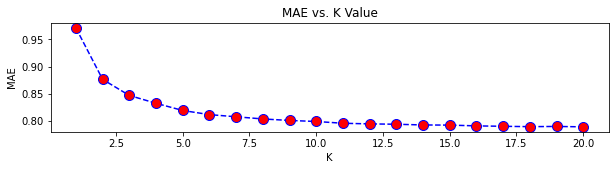

In [7]:
find_ideal_K(app, ratmat)

#### Ideal number could be around 10

In [6]:
# load instance with real data, similarity metric = euclidean
app = App()
app.configure(knn_sim_metric="euclidean")

Mean Absoloute Error for K= 1  :  1.025179856115108
Mean Absoloute Error for K= 2  :  0.9378885295587762
Mean Absoloute Error for K= 3  :  0.8952806546040882
Mean Absoloute Error for K= 4  :  0.8726542365226528
Mean Absoloute Error for K= 5  :  0.8549552660221978
Mean Absoloute Error for K= 6  :  0.8523569956032481
Mean Absoloute Error for K= 7  :  0.8442040331330986
Mean Absoloute Error for K= 8  :  0.8405467289020756
Mean Absoloute Error for K= 9  :  0.8359682086875458
Mean Absoloute Error for K= 10  :  0.8318837540864488
Mean Absoloute Error for K= 11  :  0.8284985314992015
Mean Absoloute Error for K= 12  :  0.8248926901498134
Mean Absoloute Error for K= 13  :  0.8223575441215483
Mean Absoloute Error for K= 14  :  0.8221743943662453
Mean Absoloute Error for K= 15  :  0.8206532890147247
Mean Absoloute Error for K= 16  :  0.8205724344563793
Mean Absoloute Error for K= 17  :  0.8195822021971064
Mean Absoloute Error for K= 18  :  0.819185871093309
Mean Absoloute Error for K= 19  :  0.81

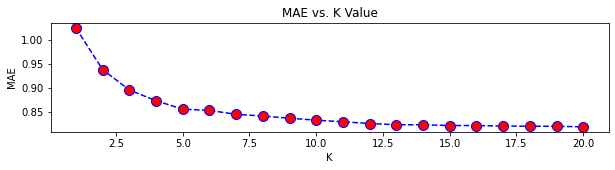

In [7]:
find_ideal_K(app, ratmat)

In [14]:
# load instance with real data, similarity metric = pearson correlation
app = App()
app.configure(knn_sim_metric="correlation")

Mean Absoloute Error for K= 1  :  0.9583249039045114
Mean Absoloute Error for K= 2  :  0.8774232256015583
Mean Absoloute Error for K= 3  :  0.8525691172201892
Mean Absoloute Error for K= 4  :  0.838480402862594
Mean Absoloute Error for K= 5  :  0.8277774437846569
Mean Absoloute Error for K= 6  :  0.8203415647198389
Mean Absoloute Error for K= 7  :  0.8115064416591217
Mean Absoloute Error for K= 8  :  0.8067767108647264
Mean Absoloute Error for K= 9  :  0.8046151865227777
Mean Absoloute Error for K= 10  :  0.8029638844021081
Mean Absoloute Error for K= 11  :  0.7993218029605805
Mean Absoloute Error for K= 12  :  0.7982422647842495
Mean Absoloute Error for K= 13  :  0.7971919587420124
Mean Absoloute Error for K= 14  :  0.7955407662094411
Mean Absoloute Error for K= 15  :  0.7954418200968084
Mean Absoloute Error for K= 16  :  0.7956506021229611
Mean Absoloute Error for K= 17  :  0.7941960381975182
Mean Absoloute Error for K= 18  :  0.7923780252910361
Mean Absoloute Error for K= 19  :  0.7

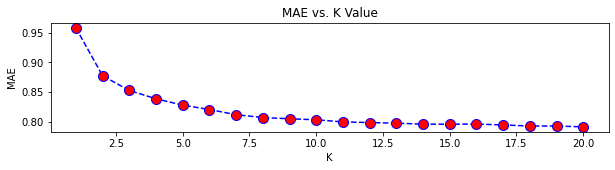

In [15]:
find_ideal_K(app, ratmat)

#### Ideal number could be about K = 10 and metric = 'correlation'

In [11]:
len(df_ratmat)

944

In [23]:
ratmat.sum(0)[:,100:110]

matrix([[238, 169,  28,   7, 190, 205, 147, 200, 446,  78]])

In [3]:
app.bs_recommend.recommend_rating(944, 266, 7)

     1    2    3    4    5    6    7    8    9   10  ...  1673  1674  1675  \
0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   

   1676  1677  1678  1679  1680  1681  1682  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[1 rows x 1682 columns]
0 index: 21 user_id: 545 rating: 2 score: 0.409003364689843
1 index: 6 user_id: 137 rating: 5 score: 0.4078907653319299
2 index: 15 user_id: 479 rating: 3 score: 0.40081602758207935
3 index: 9 user_id: 230 rating: 4 score: 0.3990257375685027
4 index: 25 user_id: 660 rating: 2 score: 0.3795310556400706
5 index: 31 user_id: 831 rating: 3 score: 0.3631393547904319
6 index: 0 user_id: 1 rating: 1 score: 0.34641493094394993
expected rating ===> 2.9014875741290163


2.9014875741290163

In [4]:
app.knn_n_neighbor

10

In [5]:
app.bs_recommend.recommend_rating(4, 1, 10)

[[0 0 0 ... 0 0 0]]
0 index: 390 user_id: 817 rating: 4 score: 0.289102996424486
1 index: 263 user_id: 550 rating: 3 score: 0.27078441134364106
2 index: 275 user_id: 580 rating: 3 score: 0.25307086369525844
3 index: 153 user_id: 324 rating: 5 score: 0.22964688215997575
4 index: 136 user_id: 294 rating: 5 score: 0.21576864040858545
5 index: 397 user_id: 831 rating: 4 score: 0.21261172988812727
6 index: 346 user_id: 730 rating: 4 score: 0.20679313348248085
7 index: 31 user_id: 66 rating: 3 score: 0.205779128967424
8 index: 342 user_id: 721 rating: 5 score: 0.2016646503060242
9 index: 120 user_id: 265 rating: 5 score: 0.2002217484533272
expected rating ===> 4.051485622833065


4.051485622833065

In [6]:
app.bs_recommend.recommend_rating(3, 1, 10)

[[0 0 0 ... 0 0 0]]
0 index: 136 user_id: 294 rating: 5 score: 0.30224657222291607
1 index: 22 user_id: 54 rating: 4 score: 0.26423072677213455
2 index: 397 user_id: 831 rating: 4 score: 0.23771433176811718
3 index: 298 user_id: 635 rating: 4 score: 0.23749177615316108
4 index: 294 user_id: 624 rating: 4 score: 0.23606414973887402
5 index: 153 user_id: 324 rating: 5 score: 0.23549394523807798
6 index: 423 user_id: 894 rating: 4 score: 0.23487352268210682
7 index: 437 user_id: 919 rating: 4 score: 0.2242006999787286
8 index: 250 user_id: 526 rating: 5 score: 0.20973185515755755
9 index: 342 user_id: 721 rating: 5 score: 0.20603688746913207
expected rating ===> 4.399277861897961


4.399277861897961

In [7]:
app.bs_recommend.recommend_rating(294, 1, 10)

[[5 0 0 ... 0 0 0]]
0 index: 14 user_id: 26 rating: 3 score: 0.5426445000762526
1 index: 293 user_id: 624 rating: 4 score: 0.5313629127895768
2 index: 22 user_id: 54 rating: 4 score: 0.529469768715587
3 index: 449 user_id: 938 rating: 4 score: 0.49001110249999114
4 index: 204 user_id: 432 rating: 2 score: 0.4810694083658399
5 index: 67 user_id: 141 rating: 3 score: 0.4734906941547976
6 index: 275 user_id: 582 rating: 4 score: 0.45709171649125613
7 index: 345 user_id: 730 rating: 4 score: 0.4568265608481732
8 index: 439 user_id: 923 rating: 3 score: 0.45373605769988223
9 index: 249 user_id: 526 rating: 5 score: 0.4469318782514028
expected rating ===> 3.591768998958921


3.591768998958921

In [10]:
app.bs_recommend.recommend_rating(294, 1, 10)

idx: [136]
[[5 0 0 ... 0 0 0]]
0 index: 14 user_id: 26 rating: 3 score: 0.5426445000762526
1 index: 293 user_id: 624 rating: 4 score: 0.5313629127895768
2 index: 22 user_id: 54 rating: 4 score: 0.529469768715587
3 index: 449 user_id: 938 rating: 4 score: 0.49001110249999114
4 index: 204 user_id: 432 rating: 2 score: 0.4810694083658399
5 index: 67 user_id: 141 rating: 3 score: 0.4734906941547976
6 index: 275 user_id: 582 rating: 4 score: 0.45709171649125613
7 index: 345 user_id: 730 rating: 4 score: 0.4568265608481732
8 index: 439 user_id: 923 rating: 3 score: 0.45373605769988223
9 index: 249 user_id: 526 rating: 5 score: 0.4469318782514028
expected rating ===> 3.591768998958921


3.591768998958921